In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns; sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig
plt.rc('figure', figsize=(6, 6))
df = pd.read_csv('data/athlete_events.csv')
regions = pd.read_csv('data/noc_regions.csv')
df = pd.merge(df, regions, on = 'NOC', how = 'left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# 0.DATA PREPARATION

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [3]:
# Data Cleaning(do not drop medal)
df=df.dropna(subset=['Sex','Age','Height','Weight','Year','Season','NOC','Team','City','Event','Sport','region'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205895 entries, 0 to 271115
Data columns (total 17 columns):
ID        205895 non-null int64
Name      205895 non-null object
Sex       205895 non-null object
Age       205895 non-null float64
Height    205895 non-null float64
Weight    205895 non-null float64
Team      205895 non-null object
NOC       205895 non-null object
Games     205895 non-null object
Year      205895 non-null int64
Season    205895 non-null object
City      205895 non-null object
Sport     205895 non-null object
Event     205895 non-null object
Medal     30172 non-null object
region    205895 non-null object
notes     3477 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 28.3+ MB


## Calculate BMI
The body mass index (BMI) or Quetelet index is a value derived from the mass (weight) and height of an individual. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m2, resulting from mass in kilograms and height in metres.

https://en.wikipedia.org/wiki/Body_mass_index

In [4]:
df['BMI']=round(df.Weight/(df.Height*df.Height/10000),2)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.69
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.76
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23.96
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN,23.96
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,23.96


## Descriptive Statistics

In [5]:
df[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,205895.000000,205895.000000,205895.000000
mean,25.057932,175.377930,70.695777
std,5.481456,10.546854,14.342470
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000


Age: Minimum age of the sportsperson is 10 and max age is 97 years. Maximum number of participants are between 21 and 28 years of age. Height: Height of the sports person ranges between 127 cms to 183 cms Weight: Weight of the sports person ranges between 25 Kgs to 79 Kgs



### Select players according to season

In [54]:
# because we plan to analyze data for summer and winter Olympics separately,
# it would be better to prepare two dataframes accordingly
dfsummer = df[df['Season'] == 'Summer']
dfwinter = df[df['Season'] == 'Winter']
dfsummer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.69
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.76
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN,23.66
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN,21.95
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN,21.95


### Select medal players

In [53]:
medals=['Gold','Silver','Bronze']
dfmedal=df[df.Medal.isin(medals)]
dfmedal.describe()

,ID,Age,Height,Weight,Year,BMI
count,30172.000000,30172.000000,30172.000000,30172.000000,30172.000000,30172.000000
mean,70222.856523,25.428808,177.646195,73.757176,1988.000795,23.164745
std,38839.415911,5.050066,10.922575,15.005371,22.718140,2.959275
min,16.000000,13.000000,136.000000,28.000000,1896.000000,13.490000
25%,37495.500000,22.000000,170.000000,63.000000,1976.000000,21.300000
50%,69772.000000,25.000000,178.000000,73.000000,1992.000000,22.930000
75%,104095.000000,28.000000,185.000000,83.000000,2006.000000,24.640000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000,56.500000


# Data Analysis

## 1. Number of Athletes by Year

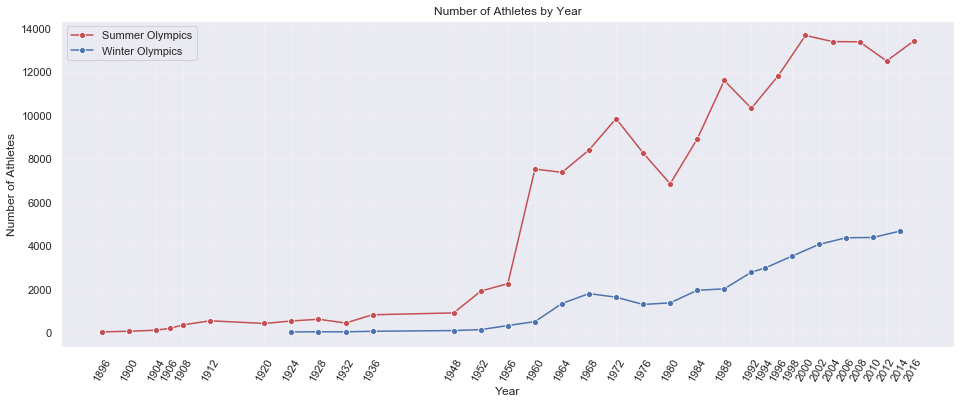

In [55]:
number_summer = dfsummer.groupby('Year', as_index = False).count()
number_winter = dfwinter.groupby('Year', as_index = False).count()
fig = plt.figure(figsize = (16, 6))
sns.lineplot(x = 'Year' , y = 'Name' , data = number_summer, label = 'Summer Olympics' , color = 'r' , marker = 'o')
sns.lineplot(x = 'Year', y = 'Name', data = number_winter, label = 'Winter Olympics', color = 'b', marker = 'o')
plt.xlabel('Year')
plt.xticks(df['Year'].unique(), rotation = 60)
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes by Year')
plt.grid(True,alpha=0.2)
plt.show()

From the above plot, we can draw several interesting points:

Starting from 1924, the Winter Olympics is organized. At the beginning (1924-1992), the two Olympics were taken place in the same year. It was changed in 1994.

During the analyzed period, there were two times when no Olympics were organized. In both cases, the reason was the war (for 1916, World War I and for 1940 and 1944, World War II)

1906 was an exception to the “every 4 years” rule as it was an experiment to hold the intercalculated games in Greece all the time and move the Olympics around. However, Greece was not able to hold the 1910 games and the 4-year rule was standardized.

There were several years when the attendance dipped. The year and the reasons are listed below:

1932: The Olympic occured in the midst of the Great Depression and in a remote location, such that many athletes were unable to afford the trip to the Olympics. 1956: Several boycotts: Iraq, Egypt, and Lebanon did not participate due to the involvement of France and Britain in the Suez Crisis; the Netherlands, Spain, Switzerland, and Cambodia did not participate due to the Soviet Union’s beatdown of the Hungarian Revolution; and China did not participate in protest of the IOC’s recognition of Taiwan. 1976: 25 nations, mostly African, boycotted the Games in reponse to apartheid policies in South Africa. Attendance at the 1980 Winter Olympics in Lake Placid wasn’t affected much since African nations have a limited presence at the Winter Games. 1980: 66 nations, including the U.S., boycotted the Games in response to the Soviet invasion of Afghanistan.

## 2.Countries at the Olympic Games


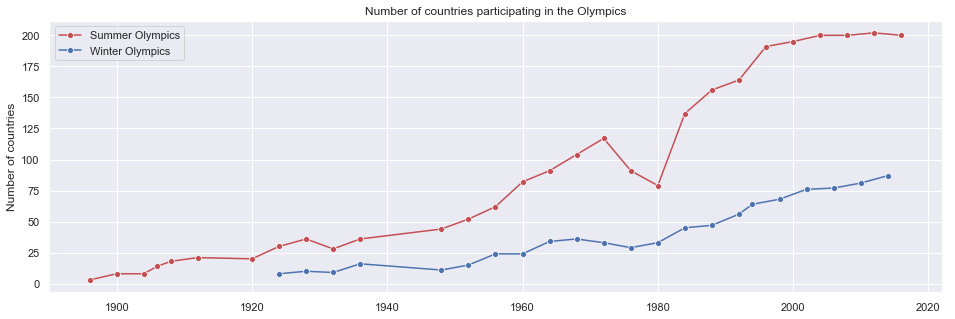

In [56]:
summer_data = (dfsummer[['Year', 'NOC']].drop_duplicates(['Year', 'NOC']))['Year'].value_counts()
winter_data = (dfwinter[['Year', 'NOC']].drop_duplicates(['Year', 'NOC']))['Year'].value_counts()
plt.figure(figsize = (16,5))
sns.lineplot(x = summer_data.index.values, y = summer_data.values, color = 'r', label = 'Summer Olympics', marker = 'o')
sns.lineplot(x = winter_data.index.values, y = winter_data.values, color = 'b', label = 'Winter Olympics', marker = 'o')
plt.ylabel('Number of countries')
plt.title('Number of countries participating in the Olympics')
plt.show()


From the above plot, we can draw several interesting points:

Starting from 1924, the Winter Olympics is organized. At the beginning (1924-1992), the two Olympics were taken place in the same year. It was changed in 1994.

During the analyzed period, there were two times when no Olympics were organized. In both cases, the reason was the war (for 1916, World War I and for 1940 and 1944, World War II)

1906 was an exception to the “every 4 years” rule as it was an experiment to hold the intercalculated games in Greece all the time and move the Olympics around. However, Greece was not able to hold the 1910 games and the 4-year rule was standardized.

There were several years when the attendance dipped. The year and the reasons are listed below:

1932: The Olympic occured in the midst of the Great Depression and in a remote location, such that many athletes were unable to afford the trip to the Olympics. 1956: Several boycotts: Iraq, Egypt, and Lebanon did not participate due to the involvement of France and Britain in the Suez Crisis; the Netherlands, Spain, Switzerland, and Cambodia did not participate due to the Soviet Union’s beatdown of the Hungarian Revolution; and China did not participate in protest of the IOC’s recognition of Taiwan. 1976: 25 nations, mostly African, boycotted the Games in reponse to apartheid policies in South Africa. Attendance at the 1980 Winter Olympics in Lake Placid wasn’t affected much since African nations have a limited presence at the Winter Games. 1980: 66 nations, including the U.S., boycotted the Games in response to the Soviet invasion of Afghanistan.



Text(0.5,1,'Medal distribution by country in the Summer Olympics')

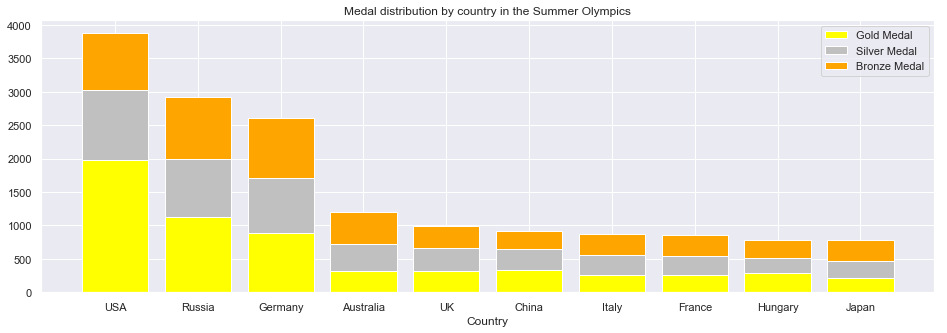

In [57]:
summer_medals = dfmedal.loc[df['Season']=='Summer']
winter_medals = dfmedal.loc[df['Season']=='Winter']
top_n_countries = pd.value_counts(summer_medals['region']).iloc[:10].index
tmp_country_medals = summer_medals[summer_medals['region'].isin(top_n_countries)]
tmp_country_medals
country_medals = pd.DataFrame(columns = ['region', 'Gold', 'Silver', 'Bronze', 'Total'])
for i in top_n_countries:
    tmp = summer_medals[summer_medals['region'] == i]
    medals = pd.value_counts(tmp['Medal'])
    country_medals = country_medals.append({'region': i, 'Gold': medals['Gold'], 'Silver': medals['Silver'], 
                                            'Bronze': medals['Bronze'], 'Total': medals['Gold'] + medals['Silver'] + medals['Bronze']
                                           },ignore_index=True)
    country_medals.sort_values('Total', ascending = False, inplace = True)

x = country_medals['region']    
    
plt.figure(figsize = (16, 5))

gold = plt.bar(x, country_medals['Gold'], color = 'yellow', label = 'Gold Medal')
silver = plt.bar(x, country_medals['Silver'], bottom = country_medals['Gold'], color = 'silver', label = 'Silver Medal')
bronze = plt.bar(x, country_medals['Bronze'], bottom = country_medals['Gold'] + country_medals['Silver'], color = 'orange', label = 'Bronze Medal')
#plt.xticks(rotation = 60)
plt.legend()
plt.xlabel('Country')
plt.title('Medal distribution by country in the Summer Olympics')

So far, in the Summer Olympic, the USA has won the most medals (both in total and gold) followed by Russia and the UK.

Text(0.5,1,'Medal distribution by country in the Winter Olympics')

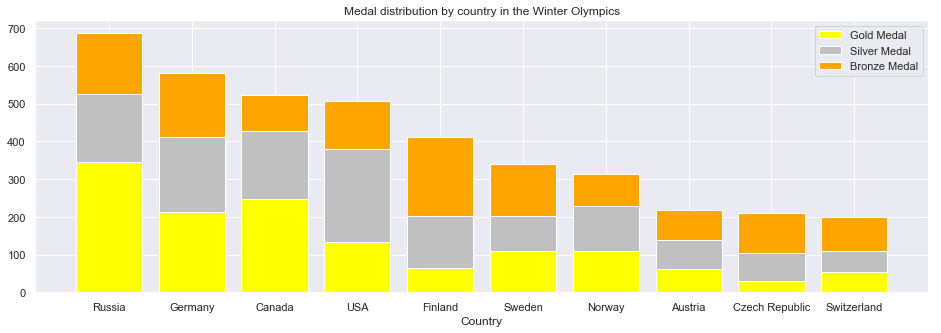

In [58]:
top_n_countries = pd.value_counts(winter_medals['region']).iloc[:10].index
tmp_country_medals = winter_medals[winter_medals['region'].isin(top_n_countries)]
tmp_country_medals
country_medals = pd.DataFrame(columns = ['region', 'Gold', 'Silver', 'Bronze', 'Total'])
for i in top_n_countries:
    tmp = winter_medals[winter_medals['region'] == i]
    medals = pd.value_counts(tmp['Medal'])
    country_medals = country_medals.append({'region': i, 'Gold': medals['Gold'], 'Silver': medals['Silver'], 
                                            'Bronze': medals['Bronze'], 'Total': medals['Gold'] + medals['Silver'] + medals['Bronze']
                                           },ignore_index=True)
    country_medals.sort_values('Total', ascending = False, inplace = True)

x = country_medals['region']    
    
plt.figure(figsize = (16, 5))

gold = plt.bar(x, country_medals['Gold'], color = 'yellow', label = 'Gold Medal')
silver = plt.bar(x, country_medals['Silver'], bottom = country_medals['Gold'], color = 'silver', label = 'Silver Medal')
bronze = plt.bar(x, country_medals['Bronze'], bottom = country_medals['Gold'] + country_medals['Silver'], color = 'orange', label = 'Bronze Medal')

#plt.xticks(rotation = 60)

plt.legend()
plt.xlabel('Country')
plt.title('Medal distribution by country in the Winter Olympics')

In the Winter Olympics, however, the USA does not dominate but Russia. Germany and Canada also hold a high position as of the USA

# 3.Observations for Canada

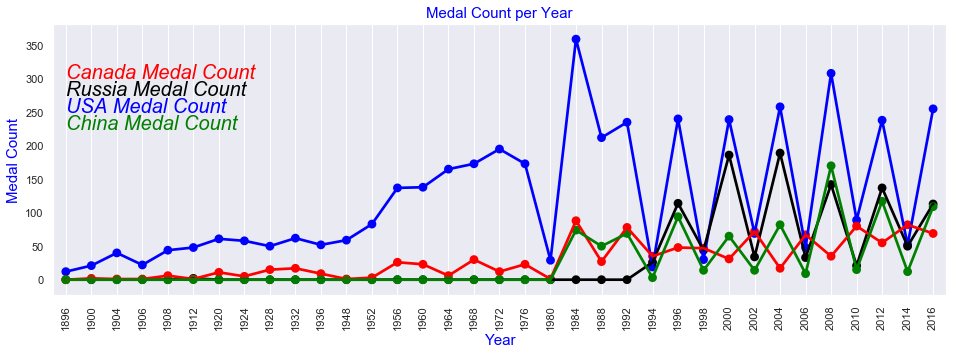

In [59]:
#This section shows the medals that the Canadian team has won from the very beginning to this time.
sum_of_medal_just_canada=[]
sum_of_medal_just_usa=[]
sum_of_medal_just_russia=[]
sum_of_medal_just_china=[]

for year in df.Year.unique():
    sum_of_medal_just_canada.append(df[(df['Year']==year)&(df['Team']=='Canada')].Medal.count())
    sum_of_medal_just_usa.append(df[(df['Year']==year)&(df['Team']=='United States')].Medal.count())
    sum_of_medal_just_russia.append(df[(df['Year']==year)&(df['Team']=='Russia')].Medal.count())
    sum_of_medal_just_china.append(df[(df['Year']==year)&(df['Team']=='China')].Medal.count())
    
sum_of_medal_just_canada=pd.DataFrame(sum_of_medal_just_canada,columns=['Canada_Medal_Count'])
sum_of_medal_just_usa=pd.DataFrame(sum_of_medal_just_usa,columns=['USA_Medal_Count'])
sum_of_medal_just_russia=pd.DataFrame(sum_of_medal_just_russia,columns=['Russia_Medal_Count'])
sum_of_medal_just_china=pd.DataFrame(sum_of_medal_just_china,columns=['China_Medal_Count'])

year_unique=pd.DataFrame(df.Year.unique(),columns=['Year'])

all_data_medal_canada=pd.concat([year_unique,sum_of_medal_just_canada],axis=1)
sum_of_medal_just_usa=pd.concat([year_unique,sum_of_medal_just_usa],axis=1)
sum_of_medal_just_russia=pd.concat([year_unique,sum_of_medal_just_russia],axis=1)
sum_of_medal_just_china=pd.concat([year_unique,sum_of_medal_just_china],axis=1)

all_data_medal_usa=sum_of_medal_just_usa.sort_values(by='USA_Medal_Count',ascending='True')
all_data_medal_russia=sum_of_medal_just_russia.sort_values(by='Russia_Medal_Count',ascending='True')
all_data_medal_canada=all_data_medal_canada.sort_values(by='Canada_Medal_Count',ascending='True')
all_data_medal_china=sum_of_medal_just_china.sort_values(by='China_Medal_Count',ascending='True')
all_data_medal_canada

#Drawings will be made in this section. Also they show the medals they won every year.
f,ax1=plt.subplots(figsize=(16,5))
sns.pointplot(x=all_data_medal_usa.Year,y=all_data_medal_usa.USA_Medal_Count,color='blue',alpha=0.8)
sns.pointplot(x=all_data_medal_russia.Year,y=all_data_medal_russia.Russia_Medal_Count,color='black',alpha=0.8)
sns.pointplot(x=all_data_medal_canada.Year,y=all_data_medal_canada.Canada_Medal_Count,color='red',alpha=0.8)
sns.pointplot(x=all_data_medal_china.Year,y=all_data_medal_china.China_Medal_Count,color='green',alpha=0.8)

plt.text(0,300,'Canada Medal Count',color='red',fontsize = 20,style = 'italic')
plt.text(0,275,'Russia Medal Count',color='black',fontsize = 20,style = 'italic')
plt.text(0,250,'USA Medal Count',color='blue',fontsize = 20,style = 'italic')
plt.text(0,225,'China Medal Count',color='green',fontsize = 20,style = 'italic')

plt.xlabel('Year',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.ylabel('Medal Count',fontsize = 15,color='blue')
plt.title('Medal Count per Year',fontsize = 15,color='blue')
plt.grid()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

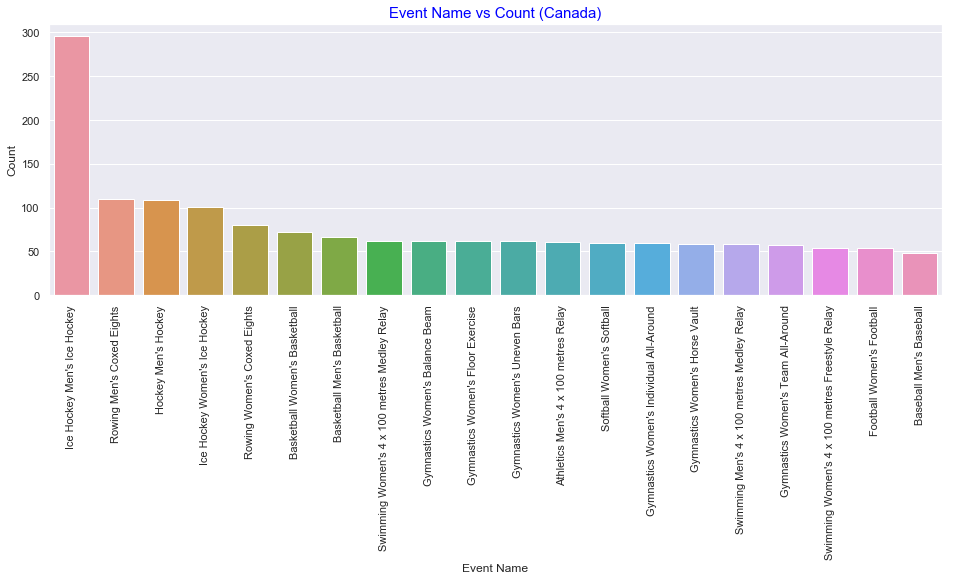

In [60]:
#In this section, necessary actions are taken for event processing. 
#In addition, all documents are scanned.

event_data=df[(df['Team']=='Canada')].Event.value_counts()
plt.figure(figsize=(16,5))
sns.barplot(x=event_data.index[:20],y=event_data.values[:20])
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Event Name vs Count (Canada)',fontsize=15,color='blue')
plt.xticks(rotation=90)

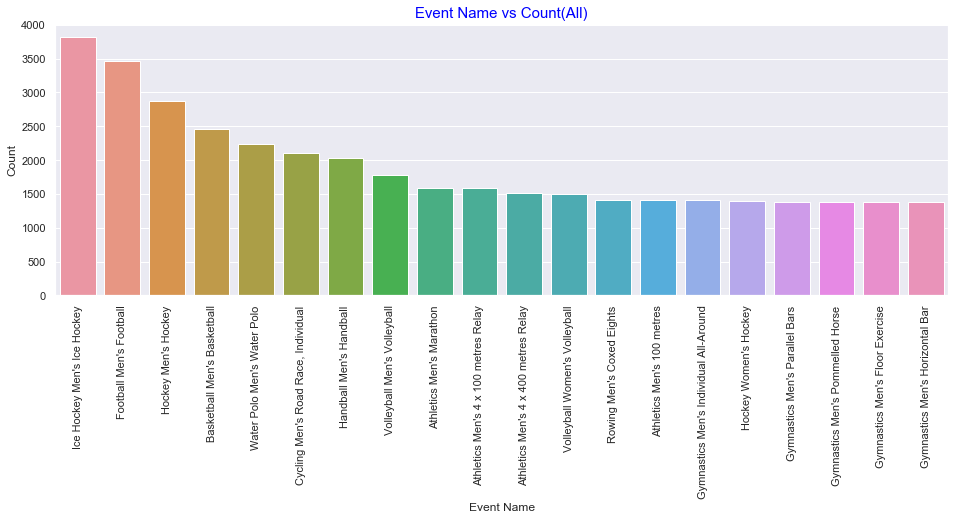

In [14]:
event_data=df.Event.value_counts()
plt.figure(figsize=(16,5))
sns.barplot(x=event_data.index[:20],y=event_data.values[:20])
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.title('Event Name vs Count(All)',fontsize=15,color='blue')
plt.xticks(rotation=90)
plt.show()

Canada has bigger advantage in Winter Olympic Games Events such as(Ice Hockey)

# 4. Age Analysis

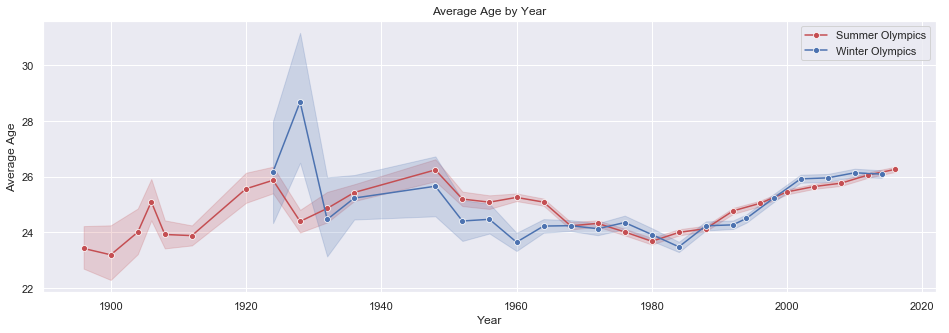

In [61]:
summer_mean_age = dfsummer[pd.notnull(dfsummer['Age'])]
winter_mean_age = dfwinter[pd.notnull(dfwinter['Age'])]
fig = plt.figure(figsize = (16, 5))
sns.lineplot(x = 'Year', y = 'Age', data = summer_mean_age, label = 'Summer Olympics', color = 'r', marker = 'o')
sns.lineplot(x = 'Year', y = 'Age', data = winter_mean_age, label = 'Winter Olympics', color = 'b', marker = 'o')
plt.title('Average Age by Year')
plt.ylabel('Average Age')
plt.show()

As seen, the average age of atheletes were much heigher in the period of 1896 - 1950s. In recent years, the average age seems to go up but still not as high as in the period of 1896 - 1950s.

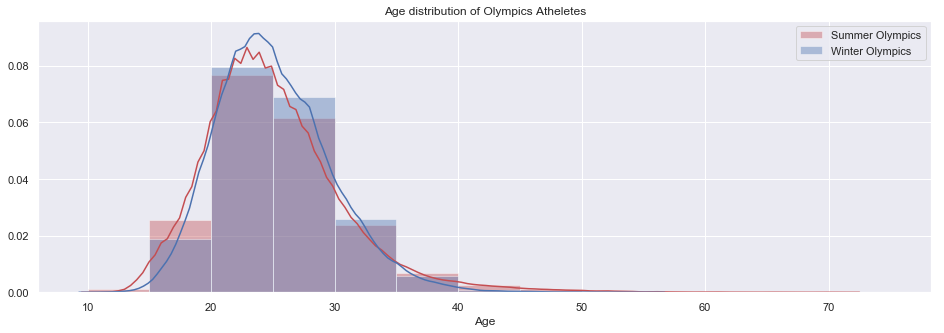

In [62]:
bins_list = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
plt.figure(figsize = (16, 5))
# Summer Olympics
sns.distplot(dfsummer['Age'],color = 'r', bins = bins_list,label = 'Summer Olympics')
sns.distplot(dfwinter['Age'],color = 'b', bins = bins_list,label = 'Winter Olympics')
plt.xlabel("Age")
plt.title("Age distribution of Olympics Atheletes")
plt.legend()
plt.show()

The two Olympics share the same age buckets with most athletes in the 20-30 range.


## Age distribution across sports -Summer- Gold/Silver/Bronze

In [63]:
summer_olympic=df[df['Season']=='Summer']
sport_count_summer =summer_olympic.groupby('Sport').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
sport_count_summer.columns=['Sport','Years']
sport_count_summer['Count']=[len(c) for c in sport_count_summer['Years']]

sport_count_summer['Years']=pd.Series(sport_count_summer['Years'])
sport_count_summer['Years']=sport_count_summer['Years'].apply(lambda x:sorted(x))  ### Sort Year in ascending order inside the Year column.

sport_count_summer.sort_values('Count',ascending=False,inplace=True)
#sport_count_summer

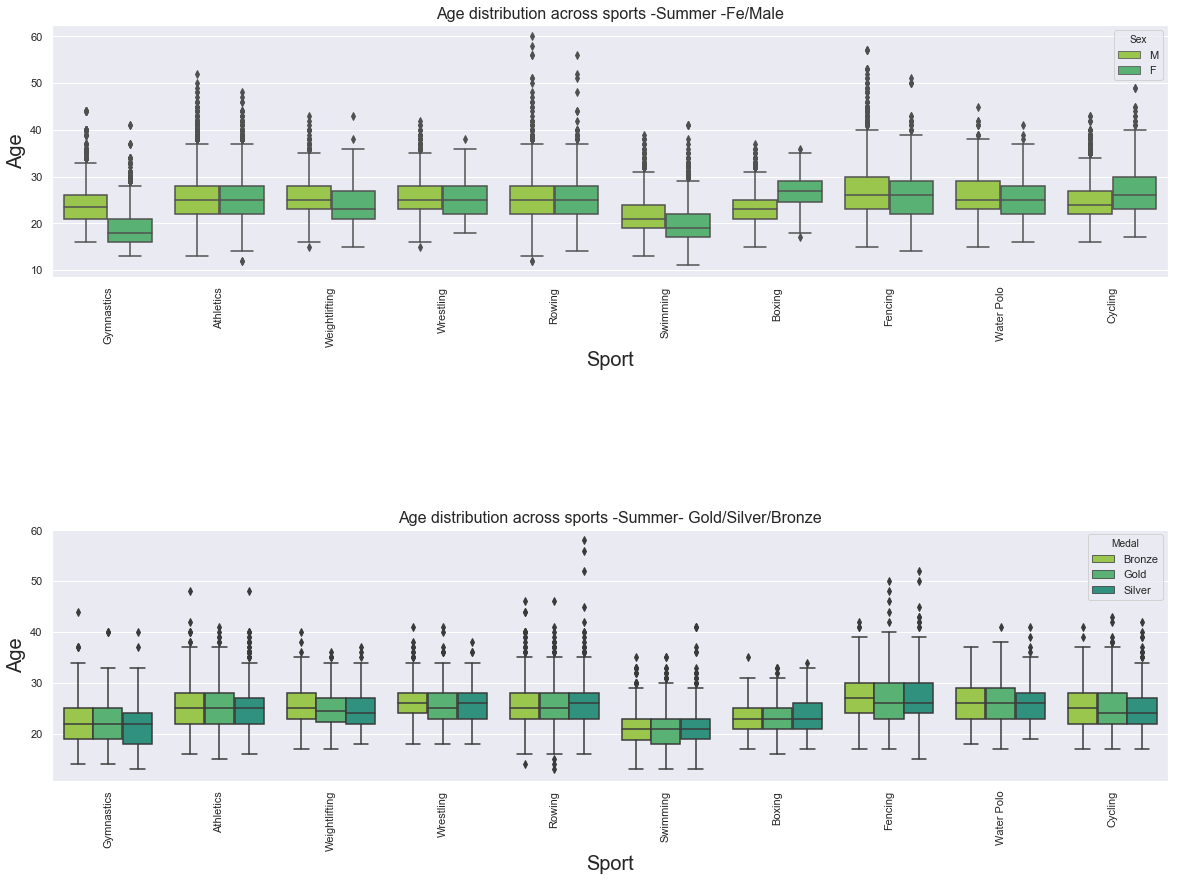

In [64]:
athlete_events_regions =pd.merge(df, regions,how='left',on='NOC')
athlete_events_regions.drop_duplicates(inplace=True,keep=False)

sport_box=athlete_events_regions[athlete_events_regions['Sport'].isin(sport_count_summer.Sport[:10])]


plt.figure(figsize=(20,20))
plt.subplot(311)
ax=sns.boxplot(x='Sport',y='Age',hue = 'Sex' ,data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=20)
ax.set_ylabel('Age',fontsize=20)
ax.set_title('Age distribution across sports -Summer -Fe/Male',fontsize=16)

plt.subplot(312)
ax=sns.boxplot(x='Sport',y='Age',hue = 'Medal',data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=20)
ax.set_ylabel('Age',fontsize=20)
ax.set_title('Age distribution across sports -Summer- Gold/Silver/Bronze',fontsize=16)

plt.subplots_adjust(wspace = 1, hspace = 1,top = 1)

## Age distribution across sports -Winter- Gold/Silver/Bronze

In [65]:
winter_olympic=df[df['Season']=='Winter']
sport_count_winter =winter_olympic.groupby('Sport').apply(lambda x:x['Year'].unique()).to_frame().reset_index()
sport_count_winter.columns=['Sport','Years']
sport_count_winter['Count']=[len(c) for c in sport_count_winter['Years']]

sport_count_winter['Years']=pd.Series(sport_count_winter['Years'])
sport_count_winter['Years']=sport_count_winter['Years'].apply(lambda x:sorted(x))  ### Sort Year in ascending order inside the Year column.

sport_count_winter.sort_values('Count',ascending=False,inplace=True)
#sport_count_winter

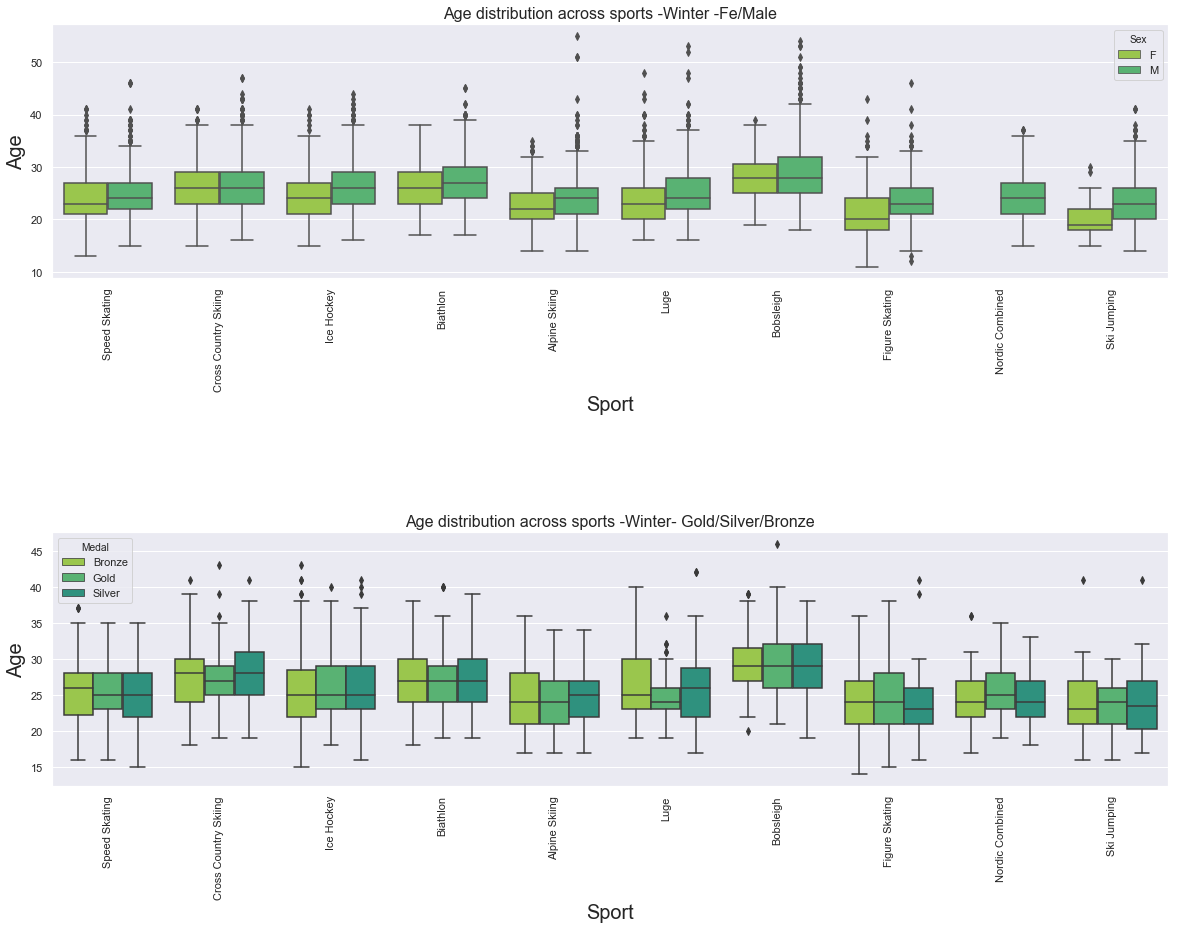

In [66]:
athlete_events_regions =pd.merge(df, regions,how='left',on='NOC')
athlete_events_regions.drop_duplicates(inplace=True,keep=False)

sport_box=athlete_events_regions[athlete_events_regions['Sport'].isin(sport_count_winter.Sport[:10])]


plt.figure(figsize=(20,15))
plt.subplot(311)
ax=sns.boxplot(x='Sport',y='Age',hue = 'Sex' ,data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=20)
ax.set_ylabel('Age',fontsize=20)
ax.set_title('Age distribution across sports -Winter -Fe/Male',fontsize=16)

plt.subplot(312)
ax=sns.boxplot(x='Sport',y='Age',hue = 'Medal',data=sport_box,palette=sns.color_palette(palette='viridis_r'))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('Sport',fontsize=20)
ax.set_ylabel('Age',fontsize=20)
ax.set_title('Age distribution across sports -Winter- Gold/Silver/Bronze',fontsize=16)



plt.subplots_adjust(wspace = 1, hspace = 1,top = 1.3)

# 5.Gender distribution

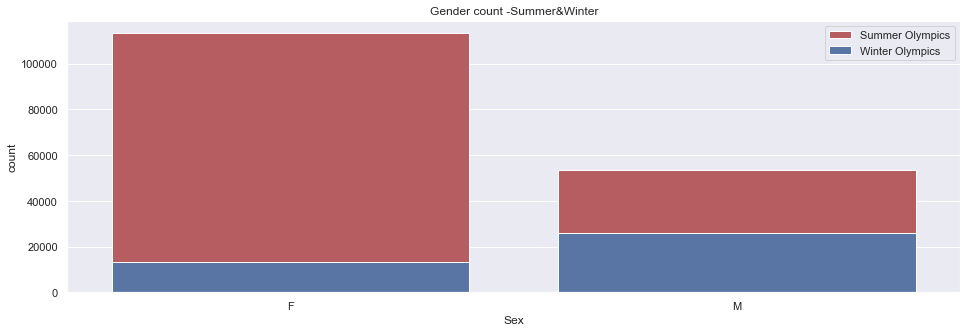

In [67]:
summer_gender = dfsummer.groupby('Sex')
winter_gender = dfwinter.groupby('Sex')

dfsummer.Sex.unique()
dfsummer.Sex.value_counts()
dfwinter.Sex.unique()
dfwinter.Sex.value_counts()

plt.figure(figsize = (16, 5))
sns.countplot(dfsummer.Sex,color = 'r',label = 'Summer Olympics')
sns.countplot(dfwinter.Sex,color = 'b',label = 'Winter Olympics')
plt.title('Gender count -Summer&Winter')
plt.legend()
plt.show()

Number of Players:

Summer Olympics : Female Players > Male Players

Winter Olympics : Memale Players > Female Players

# 6. Height\Weight\BMI Analysis

Underweight < 18.5
Normal (healthy weight)		18.5	25
Overweight 	25	30
Obese	> 30

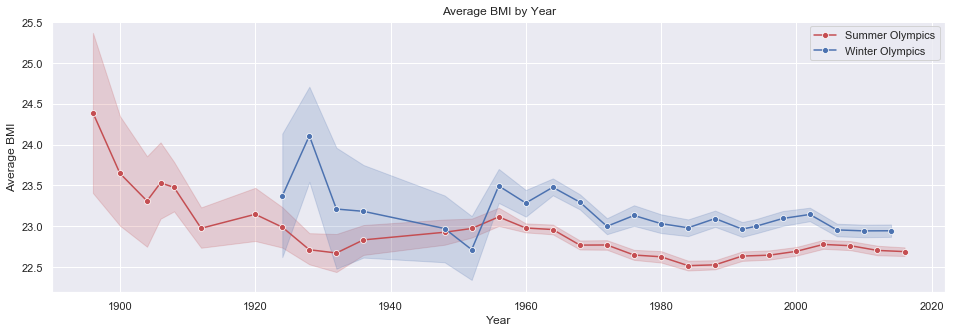

In [68]:
summer_mean_bmi = dfsummer[pd.notnull(dfsummer['Age'])]
winter_mean_bmi = dfwinter[pd.notnull(dfwinter['Age'])]
fig = plt.figure(figsize = (16, 5))
sns.lineplot(x = 'Year', y = 'BMI', data = summer_mean_bmi, label = 'Summer Olympics', color = 'r', marker = 'o')
sns.lineplot(x = 'Year', y = 'BMI', data = winter_mean_bmi, label = 'Winter Olympics', color = 'b', marker = 'o')
plt.title('Average BMI by Year')
plt.ylabel('Average BMI')
plt.show()

Winter Players tends to have higher BMI than Summer Players.

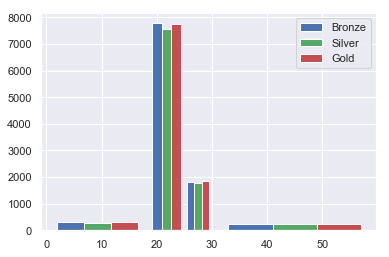

In [69]:
dfgold=df.loc[df.Medal == 'Gold']
dfsilver=df.loc[df.Medal == 'Silver']
dfbronze=df.loc[df.Medal=='Bronze']
plt.style.use('seaborn-deep')
plt.hist([dfbronze.BMI,dfsilver.BMI,dfgold.BMI], bins=[0,18.5,25,30,60], label=['Bronze', 'Silver','Gold'])
plt.legend(loc='upper right')
plt.show()

Players whoes BMI is between 18.5 and 25(healthy weight) have more chance to win a medal.

# 7. Age Height Weight BMI Predictions

We select Track(Athletics) tp do our next analysis

In [73]:
selected_sports=['Athletics']
dfAthletics=df.loc[df["Sport"].isin(selected_sports)]
dfAthletics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland,NaN,36.39
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN,Estonia,NaN,23.12
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN,France,NaN,21.73
130,47,Erling Rudolf Aastad,M,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Norway,NaN,23.62
131,47,Erling Rudolf Aastad,M,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's Long Jump,NaN,Norway,NaN,23.62


In [74]:
dfAthletics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32348 entries, 57 to 271103
Data columns (total 18 columns):
ID        32348 non-null int64
Name      32348 non-null object
Sex       32348 non-null object
Age       32348 non-null float64
Height    32348 non-null float64
Weight    32348 non-null float64
Team      32348 non-null object
NOC       32348 non-null object
Games     32348 non-null object
Year      32348 non-null int64
Season    32348 non-null object
City      32348 non-null object
Sport     32348 non-null object
Event     32348 non-null object
Medal     3648 non-null object
region    32348 non-null object
notes     744 non-null object
BMI       32348 non-null float64
dtypes: float64(4), int64(2), object(12)
memory usage: 4.7+ MB


In [75]:
dfA=dfAthletics.drop(['ID','Name','Sex','NOC','Games','Year','Season','Event','region','notes','Team','City','Sport'],axis=1) #drop useless columns

In [76]:
dfA.head()

,Age,Height,Weight,Medal,BMI
57,31.0,189.0,130.0,NaN,36.39
94,24.0,174.0,70.0,NaN,23.12
98,30.0,187.0,76.0,NaN,21.73
130,22.0,177.0,74.0,NaN,23.62
131,22.0,177.0,74.0,NaN,23.62


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207099C8F60>,
      dtype=object)

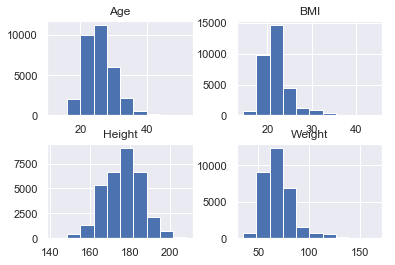

In [77]:
dfA.hist()

In [78]:
#MARK GOLD 3 point Silver 2 point Bronze 1 point
scorelist=[]
for index, row in dfA.iterrows():
    if row['Medal'] == 'Gold':
        x=3
    elif row['Medal']=='Silver':
        x=2
    elif row['Medal']=='Bronze':
        x=1
    else:
        x=0
    scorelist.append(x)
dfA['Score']=scorelist

In [79]:
dfA.head()

,Age,Height,Weight,Medal,BMI,Score
57,31.0,189.0,130.0,NaN,36.39,0
94,24.0,174.0,70.0,NaN,23.12,0
98,30.0,187.0,76.0,NaN,21.73,0
130,22.0,177.0,74.0,NaN,23.62,0
131,22.0,177.0,74.0,NaN,23.62,0


In [80]:
dfA.describe()

,Age,Height,Weight,BMI,Score
count,32348.000000,32348.000000,32348.000000,32348.000000,32348.000000
mean,25.330654,176.279925,69.279770,22.090424,0.229597
std,4.407018,9.333984,15.420925,3.315099,0.700304
min,12.000000,142.000000,35.000000,14.510000,0.000000
25%,22.000000,170.000000,59.000000,20.050000,0.000000
50%,25.000000,176.000000,67.000000,21.470000,0.000000
75%,28.000000,183.000000,76.000000,23.180000,0.000000
max,52.000000,208.000000,165.000000,44.380000,3.000000


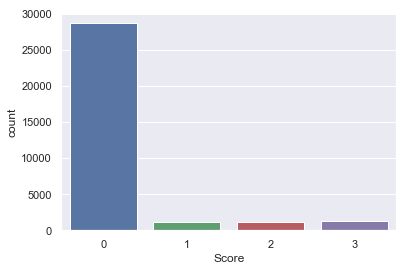

In [81]:
sns.countplot(dfA['Score'],label="Count")
plt.show()

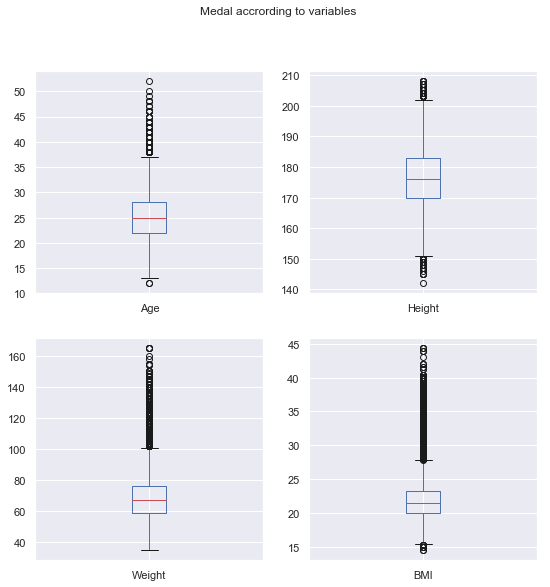

In [82]:
dfA.drop(columns=['Score','Medal'], axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Medal accrording to variables')
plt.savefig('box')
plt.show()

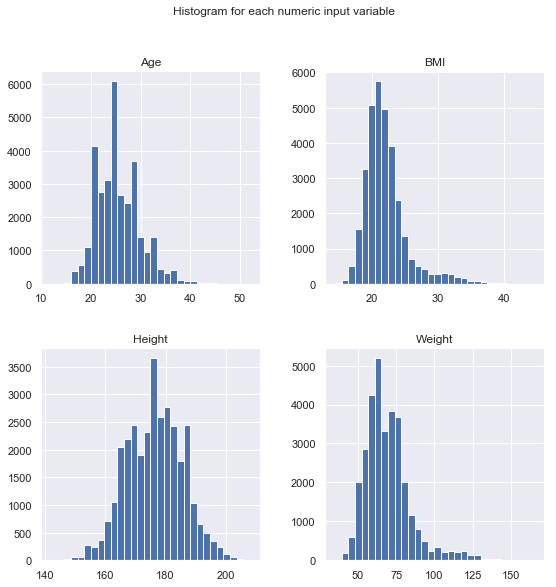

In [83]:
dfA.drop(columns=['Score','Medal'] ,axis=1).hist(bins=30, figsize=(9,9))
plt.suptitle("Histogram for each numeric input variable")
plt.savefig('medal_hist')
plt.show()

C:\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


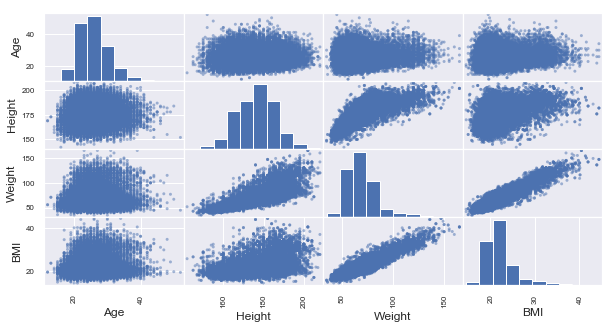

In [84]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dfA.drop(columns=['Score','Medal'], axis=1), figsize=(10, 5))
plt.show()

## Performing the Multiple Linear Regression

In [85]:
X = dfA[['Age', 'BMI', 'Height','Weight']]
y = dfA['Score']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     898.3
Date:                Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:39:49   Log-Likelihood:                -34323.
No. Observations:               32348   AIC:                         6.865e+04
Df Residuals:                   32344   BIC:                         6.869e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0034      0.001     -3.913      0.000      -0.005      -0.002
BMI           -0.0029      0.002     -1.301      0.193      -0.007       0.001
Height         0.0013      0.000      6.434      0.000       0.001       0.002
Weight         0.0023      0.001      4.252      0.000       0.001       0.003
==============================================================================
Omnibus:                    19952.817   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144130.676
Skew:                           3.074   Prob(JB):                         0.00
Kurtosis:                      11.315   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predictions

In [86]:
data = np.matrix(dfA)
lm = LinearRegression()
model = lm.fit(X,y)

In [87]:
predictions = lm.predict(X)
print(predictions)


[0.31271073 0.23249787 0.24626955 ... 0.21047326 0.23367591 0.22043856]


### ask for input to do prediction

In [ ]:
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

AGE=int(input("text your Age"))
Height=int(input("text your Height"))
Weight=int(input("text your Weight"))
BMI=round(Weight/(Height*Height/10000),2)

predicter = lm.predict([[AGE,BMI,Height,Weight]])
print("Your Athletics Score is " + str(predicter))


Intercept: 
 -0.47107512338385304
Coefficients: 
 [-0.00330934  0.0077431   0.0038546  -0.0009532 ]
